# Ford GoBike System Facts
### by Mohamed Samir Ahmed Assem

## Investigation Overview

> This Presentation provides insights conducted from FORD-Go Bike sharing system data for February 2019.

## Dataset Overview

> Dataset contains data about more than 180k trips occured during February 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import calendar
from datetime import time
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike.csv')
#Removing rows with missing values
df.dropna(inplace=True)
#Converting some data types into usable data types 
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])
#Creating a new age column and removing ages > 100 years
df['age']=df['start_time'].dt.year-df['member_birth_year']
df.drop(df[df['age'] > 100].index, inplace = True)
base_color=sb.color_palette()[0]

## Who are the users
### Ages

> most users' ages are between 18 and 42 years old.

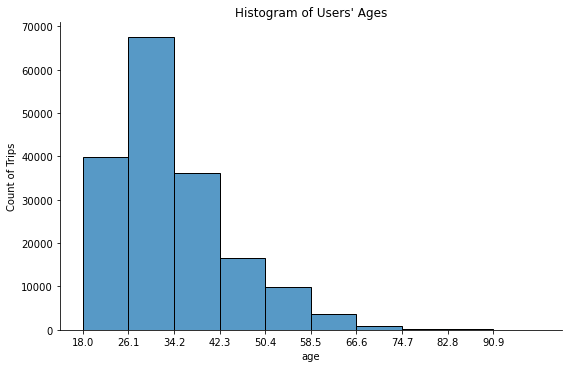

In [3]:
#age
bins=10
fig=sb.displot(data=df,x='age',bins=bins,height=5, aspect=1.6);
tick_step=(df['age'].max()-df['age'].min())/bins
fig.set(xticks=np.arange(df['age'].min(),df['age'].max(),tick_step));
fig.set(title="Histogram of Users' Ages");
fig.set(ylabel="Count of Trips");

## Who are the users?
### Genders
> Male users represent 76% of total users



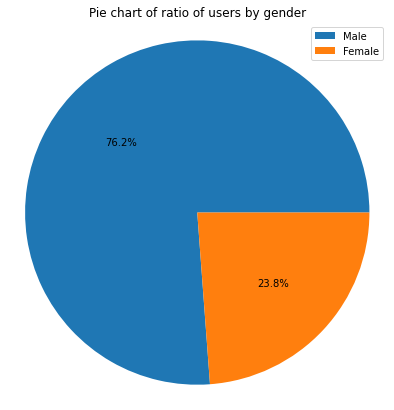

In [4]:
#Gender
df_filtered=df[df['member_gender']!= 'Other']
gender_counts=df_filtered['member_gender'].value_counts()/df_filtered['member_gender'].shape[0]
plt.figure(figsize=(7,7))
plt.pie(gender_counts,autopct = '%1.1f%%');
plt.axis('square');
plt.legend(labels=gender_counts.index)
plt.title('Pie chart of ratio of users by gender');

## Who are the users?
### Types
> 90.5% of users are subscribers.

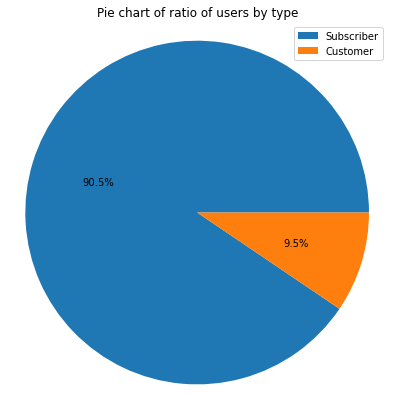

In [5]:
#user types
user_counts=df['user_type'].value_counts()/df['user_type'].shape[0]
plt.figure(figsize=(7,7))
plt.pie(user_counts,autopct = '%1.1f%%');
plt.axis('square');
plt.legend(labels=user_counts.index)
plt.title('Pie chart of ratio of users by type');

## Time of Day and Number of Trips

> Trip requests fall at night but customers' highest number of trips usually take place in the after noon. 
    <br>
    <br>
    Please note that:
    <br>
    Morning &nbsp;&nbsp;&nbsp; :&nbsp; 6.00  AM to 12:00 PM 
    <br>
    Afternoon &nbsp;:&nbsp; 12:00 PM to 18:00 PM 
    <br>
    Night &nbsp; &nbsp; &nbsp; &nbsp;  :&nbsp; 18:00 PM to 06:00 AM 

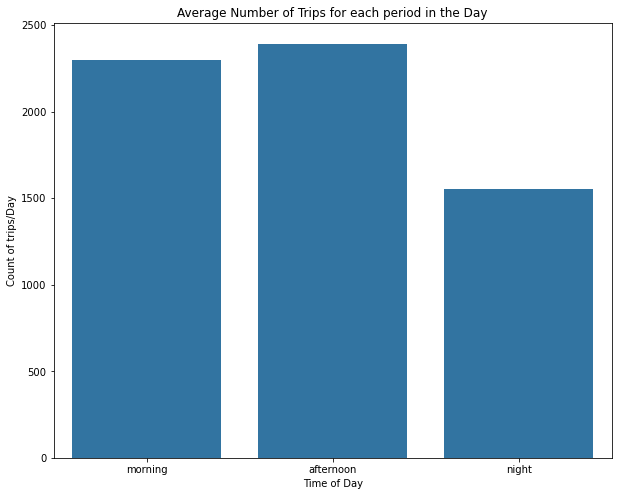

In [6]:
# time of day (6.00 AM to 12:00 PM  : Morning
#              12:00 PM to 18:00 PM : Afternoon
#              18:00 PM to 06:00 AM : Night)
conditions = [
    (df['start_time'].dt.time > time(12,0,0)) & (df['start_time'].dt.time <= time(18,0,0)),
    (df['start_time'].dt.time > time(18,0,0)) & (df['start_time'].dt.time <= time(23,59,59)),
    (df['start_time'].dt.time > time(0,0,0)) & (df['start_time'].dt.time < time(6,0,0)),
    (df['start_time'].dt.time >= time(6,0,0)) & (df['start_time'].dt.time <= time(12,0,0))]

# create a list of the values we want to assign for each condition
values = ['afternoon', 'night', 'night', 'morning']

# create a new column and use np.select to assign values to it using our lists as arguments
df['time_day'] = np.select(conditions, values)
# Create a new column contains only the date from start_time column
df['start_day']=df['start_time'].dt.date
fig_data=df['time_day'].value_counts()/df['start_day'].nunique()
fig_order=['morning','afternoon','night']
plt.figure(figsize=(10,8))
g=sb.barplot(x=fig_data.index.values, y=fig_data,order=fig_order,color=base_color);
g.set(xlabel='Time of Day');
g.set(ylabel='Count of trips/Day');
g.set(title='Average Number of Trips for each period in the Day');

## Time of Day and Number of Trips
>Customers usually make more trips in the after noon.

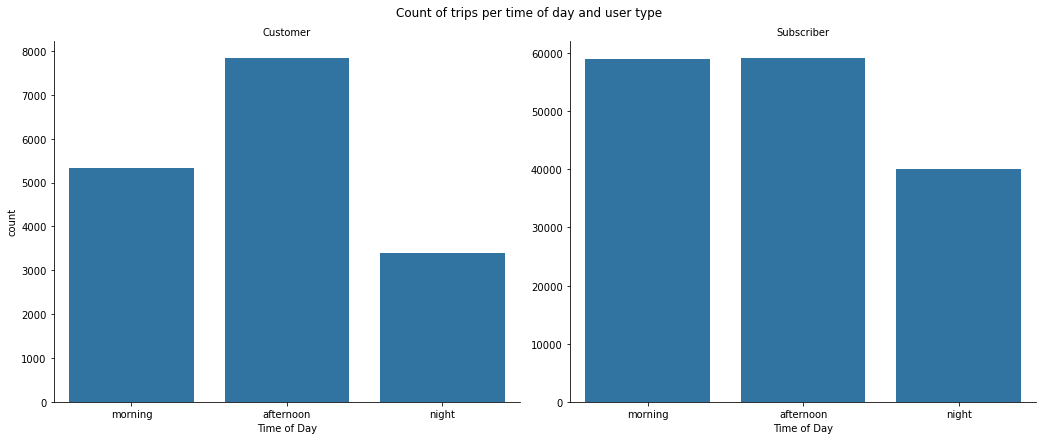

In [7]:
ax=sb.catplot(x="time_day", col="user_type",data=df,color=base_color, kind="count",height=6,margin_titles=True, aspect=1.2,order=['morning','afternoon','night'],sharey=False);
ax.set_titles(row_template = '{row_name}', col_template = '{col_name}');
ax.set(xlabel="Time of Day");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Count of trips per time of day and user type');

## Day of Week and Number of Trips
>Most trips take place on tuesday and thursday

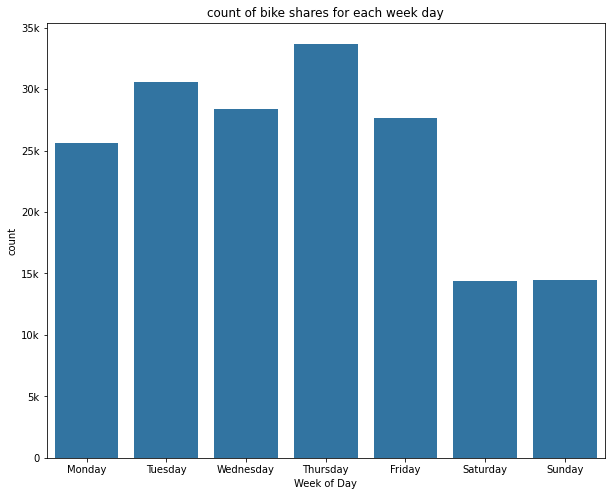

In [8]:
#Day of week
df['week_day']=df['start_time'].dt.day_name()
fig_order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday', 'Sunday']
plt.figure(figsize=(10,8))
fig=sb.countplot(data = df,x='week_day',order=fig_order,color=base_color);
fig.set(title ='count of bike shares for each week day');
y_labels=['0','5k','10k','15k','20k','25k','30k','35k']
y_ticks=[0,5000,10000,15000,20000,25000,30000,35000]
plt.yticks(y_ticks,y_labels);
plt.xlabel('Week of Day');

## Day of Week and Number of Trips
### User-Type
>Customers show less variable daily trip than subscribers who make less trips on Saturdays and Sundays

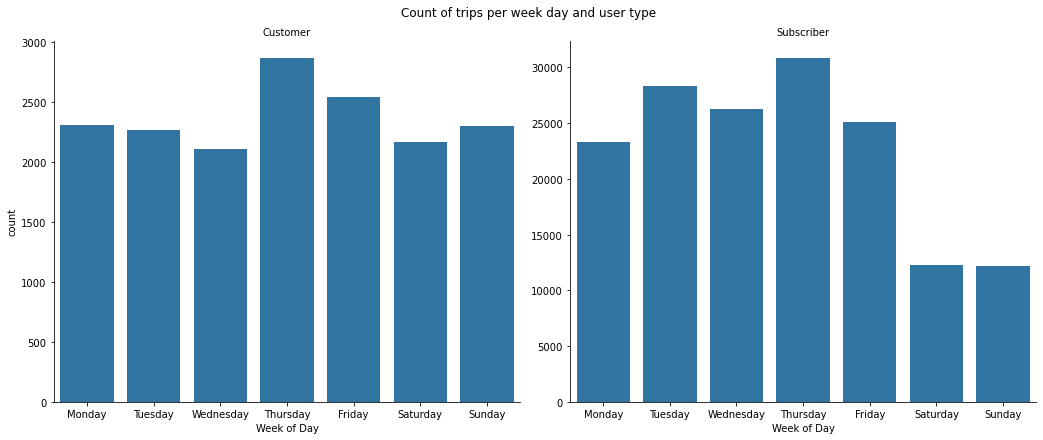

In [9]:
g=sb.catplot(x="week_day", col="user_type",data=df,color=base_color, kind="count",height=6, aspect=1.2,order=fig_order,sharey=False);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.set(xlabel="Week of Day");
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of trips per week day and user type');

## Trip Duration
>Duration of trips follows a right skewed normal distribution, having an average of 11.7 minutes and minimum of 1 minute and maximum of 23.5 hrs, however 99.3% of trips are shorter than 62 minutes.

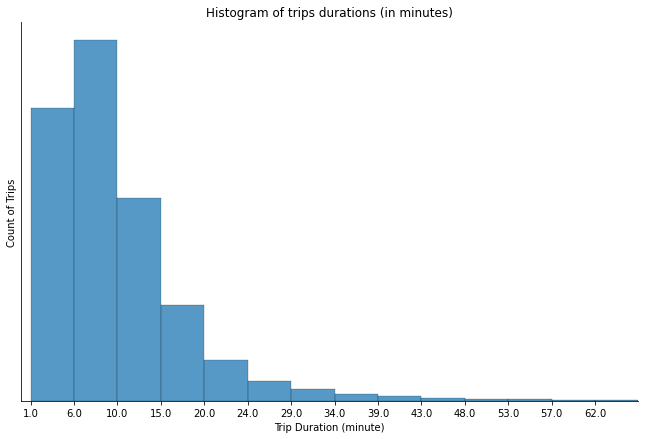

In [10]:
bins=300
fig=sb.displot(data=df,x='duration_sec',bins=bins,height=6, aspect=1.6);
tick_step=(df['duration_sec'].max()-df['duration_sec'].min())/(bins)
x_ticks=np.arange(df['duration_sec'].min(),df['duration_sec'].max(),tick_step)
fig.set(xticks=x_ticks,xticklabels=np.around(x_ticks/60));
fig.set(yticks=[]);
fig.set(xlabel="Trip Duration (minute)");
fig.set(ylabel="Count of Trips");
fig.set(title="Histogram of trips durations (in minutes)")
fig.set(xlim=(0,4000));

## Trip Duration and Day of Week
>Longer trips are in week ends!

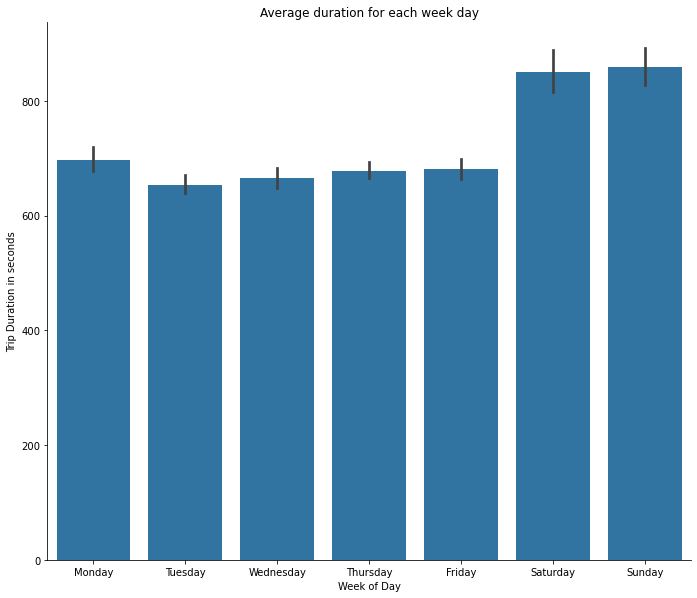

In [11]:
#Average trip duration by week day
fig=sb.catplot(data = df,x='week_day',y='duration_sec',order=fig_order,color=base_color,kind='bar',height=8,aspect=1.2);
fig.set(title ='Average duration for each week day');
fig.set(xlabel='Week of Day');
fig.set(ylabel='Trip Duration in seconds');

## Trip duration and User Type and Gender
>Customers seem to make longer trips than subscribers also females seem to make longer trips. 

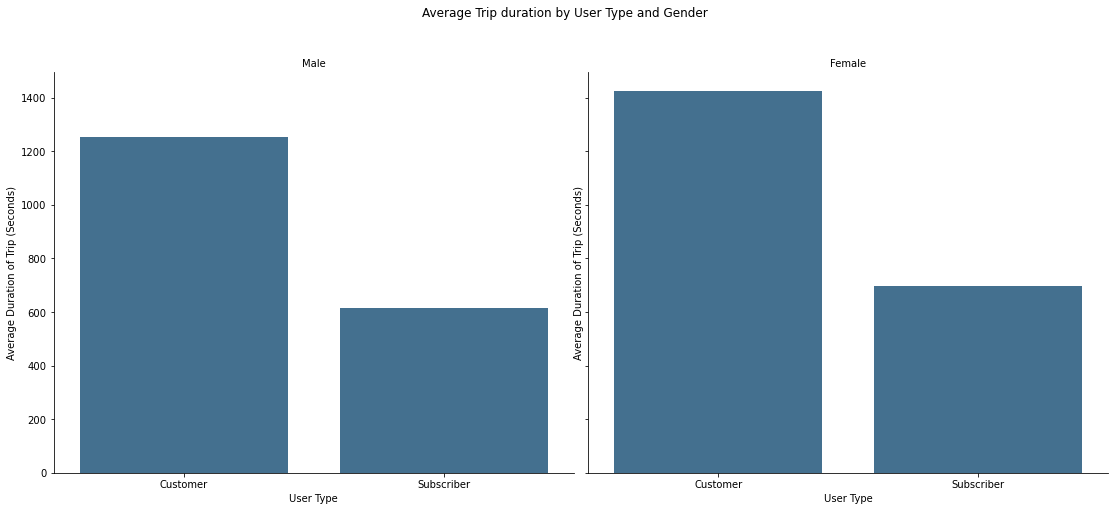

In [12]:
df_filtered=df[df['member_gender']!= 'Other']
g = sb.catplot(x="user_type", y='duration_sec',color=base_color, col="member_gender",data=df_filtered, saturation=.5,kind="bar", ci=None,height=7, aspect=1.1,margin_titles=True);
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip duration by User Type and Gender');
g.set(xlabel='User Type');
g.set(ylabel='Average Duration of Trip (Seconds)');

# THANK YOU